# Homework 2 - Logistic Regression
## CSCI 5622 - Spring 2019
***
**Name**: $<$$>$ 
***

This assignment is due on Canvas by **11.59 PM on Tuesday, February 12th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

## Overview 
***

Your task for this homework is to build a logistic regression model that implements stochastic gradient ascent. To start, you'll apply it to the task of determining whether a number is 8 or 9

We start by importing and plotting the given data

In [52]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 


###### [ 50 points] Problem 1: Implementing the Logistic Regression Classifier
***

In [53]:
import matplotlib.pylab as plt
%matplotlib inline
import pickle, gzip       
import numpy as np

class Numbers:
    """
    Class to store MNIST data for images of 9 and 8 only
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        train_indices = np.where(self.train_y > 7)
        self.train_x, self.train_y = self.train_x[train_indices], self.train_y[train_indices]
        self.train_y = self.train_y - 8
 
        self.valid_x, self.valid_y = valid_set
        valid_indices = np.where(self.valid_y > 7)
        self.valid_x, self.valid_y = self.valid_x[valid_indices], self.valid_y[valid_indices]
        self.valid_y = self.valid_y - 8

In [54]:
data2=Numbers('mnist.pklz')

In this homework you'll implement a Logistic Regression classifier to take drawings of either an eight or a nine and output the corresponding label.
1.1 - Finish the `calculate_score` function to return the output of applying the dot product of the weights with the input parameter

1.2 - Finish the `sigmoid` function to return the output of applying the sigmoid function to the calculated score

1.3 - Finish the `compute_gradient` function to return the derivate of the cost w.r.t. the weights

1.4 - Finish the `sgd_update` function so that it performs stochastic gradient descent on the single training example and updates the weight vector correspondingly

1.5 - Finish the `mini_batch_update` function so that it performs mini-batch gradient descent on the batches of the training data set example and updates the weight vector correspondingly

In [55]:
from collections import defaultdict
from numpy import random
class LogReg:
    
    def __init__(self, X, y, eta = 0.1):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: Learning rate (the default is a constant value)
        :method: This should be the name of the method (sgd_update or mini_batch_descent)
        :batch_size: optional argument that is needed only in the case of mini_batch_descent
        """
        self.X = X # was capital X
        self.y = y
        self.w = np.zeros(X.shape[1]) # can remove from here and ask to be defined in the function
        self.eta = eta
        
        
        
    def calculate_score(self, x):
        """
        :param x: This can be a single training example or it could be n training examples
        :return score: Calculate the score that you will plug into the logistic function
        
        """
        #self.w2=np.transpose(self.w)
        score=np.dot(x,self.w) 
        #print(score)
        #sigmoid(score)
        return(score)
        
        # TODO: Compute the score to be fed to the sigmoid function
    
    def sigmoid(self, score):
        """
        :param score: Either a real valued number or a vector to convert into a number between 0 and 1
        :return sigmoid: Calcuate the output of applying the sigmoid function to the score. This could be a single
        value or a vector depending on the input
        """
        # TODO: Complete this function to return the output of applying the sigmoid function to the score
            
        h = 1.0/(1.0 + np.exp(-score))
        #print(h)
        return(h)
    
    def compute_gradient(self, x, h, y):
        """
        :param x: Feature vector
        :param h: predicted class label
        :param y: real class label
        :return gradient: Return the derivate of the cost w.r.t to the weights
    
        """
        
        grad=np.dot(x.T,(h-y))

        return(grad)
    
    
                
        
     
    def sgd_update(self):
        """
        Compute a stochastic gradient update over the entire dataset to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :return: Return the new value of the regression coefficients
        """ 
        # TODO: Finish this function to do a stochastic gradient descent update over the entire dataset
        # and return the updated weight vector
        
        
       
        for i in range(len(self.X)):
            h= self.sigmoid(self.calculate_score(self.X[i]))
            grad=self.compute_gradient(self.X[i],h,self.y[i])
            self.w=self.w-self.eta*grad
        
        
            
        return (self.w)
        
        
    
    def mini_batch_update(self, batch_size):
        """
        One iteration of the mini-batch update over the entire dataset (one sweep of the dataset).
        :param X: NumPy array of features (size : no of examples X features)
        :param y: Numpy array of class labels (size : no of examples X 1)
        :param batch_size: size of the batch for gradient update
        :returns w: Coefficients of the classifier (after updating)
        """
        # TODO: Performing mini-batch training follows the same steps as in stochastic gradient descent,
        # the only major difference is that we’ll use batches of training examples instead of one. 
        # Here we decide a batch size, which is the number of examples that will be fed into the 
        # computational graph at once.
        
        
        for i in range(0,len(self.X),batch_size):
            h= self.sigmoid(self.calculate_score(self.X[i:i+batch_size]))
            grad=self.compute_gradient(self.X[i:i+batch_size],h,self.y[i:i+batch_size])
            self.w=self.w-self.eta*grad
                
        return (self.w)
    
    def progress(self, test_x, test_y, update_method, *batch_size):
        """
        Given a set of examples, computes the probability and accuracy
        :param test_x: The features of the test dataset to score
        :param test_y: The features of the test 
        :param update_method: The update method to be used, either 'sgd_update' or 'mini_batch_update'
        :param batch_size: Optional arguement to be given only in case of mini_batch_update
        :return: A tuple of (log probability, accuracy)
        """
        # TODO: Complete this function to compute the predicted value for an example based on the logistic value
        # and return the log probability and the accuracy of those predictions
        #training
        if(update_method=='mini_batch_update'):
            self.mini_batch_update(batch_size[0])
        else:
            self.sgd_update()
        
        #testing
        h=self.sigmoid(self.calculate_score(test_x))
        #print(h)
        log_probablity=(1/len(test_y))*(np.sum(test_y*np.log(h))+(1-test_y)*np.log(1-h))  
            
            
            #get acuuracy
        num_of_right=0
        for i in range(len(test_y)):
            if abs(test_y[i]-h[i])<0.5:
                num_of_right += 1
           # print(num_right)
        accuracy=num_of_right/len(test_y)
        #print(len(test_y))
        #print(log_prob)
        #print (accuracy)
        return (log_probablity,accuracy)
                
        
        
        

    
    

In [56]:
import unittest

class LogRegTester(unittest.TestCase):
    def setUp(self):
        self.X = np.array([[0.1, 0.3 ], [0.4, 0.6], [0.8, 0.1], [0.8, 0.1], [0.5, 0.8]])
        self.y = np.array([0,  0, 1, 1,  0])
        self.log_reg_classifier_1 = LogReg(self.X, self.y, 0.5)
        self.log_reg_classifier_2 = LogReg(self.X, self.y, 0.5)
        #self.d=self.log_reg_classifier_1.calculate_score(self.X)
        
    def test_sgd_update(self):
        """
        Test sgd_update function from LogReg
        """
        weights = self.log_reg_classifier_1.sgd_update()
        self.assertEqual(round(weights[0], 2), 0.16)
        self.assertEqual(round(weights[1], 2), -0.37)
        
    def tests_mini_batch_update(self):
        """
        Test mini_batch_update function from LogReg
        """
        weights = self.log_reg_classifier_2.mini_batch_update(2)
        self.assertEqual(round(weights[0], 2), 0.17)
        self.assertEqual(round(weights[1], 2), -0.37)
        
    def tests_progress_sgd_update(self):
        """
        Test progress function from LogReg with method = 'sgd_update'
        """
        self.log_reg_classifier_1 = LogReg(self.X[:4], self.y[:4], 0.5)
        log_prob, accuracy = self.log_reg_classifier_1.progress(self.X[4:], self.y[4:], 'sgd_update')
        #print(log_prob)
        #print(accuracy)
        self.assertEqual(round(log_prob.flat[0], 2), -0.7)
        self.assertEqual(accuracy, 0)
        
        
        
        
    
    #BEGIN Workspace
    #Add more test functions as required
    #END Workspace
    
tests = LogRegTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

...
----------------------------------------------------------------------
Ran 3 tests in 0.009s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

##### [20 Points] Problem 2: Understanding the limits of the Logistic Regression Classifier

2.1 - After completing the class above, loop over the training data and perform ___stochastic gradient descent___ for three different user-defined number of epochs 1, 3, 10], and five different values of eta range [.0001, .01, .1, .5, 1]. Train your model and do the following:

* Using the `progress` method, calculate the accuracy on the training and the valid sets every 100 iterations. Plot them on same graph for every comparison.

* Using `progress` method, calculate the accuracy on the validation set and store it for every epoch.

Don't forget to shuffle your training data after each epoch.

In [57]:

from sklearn.utils import shuffle
ep=[1,3,10]
epoch2= len(ep)
print(epoch2)
etas=[.0001,.01,.1,.5,1]
test_data={}
train_data={}

for eta in etas:
    myobj1=LogReg(data2.train_x,data2.train_y,eta)
    accuracies_Test=[]
    accuracies_Train=[]
    #for epoch in epochs:
    for epoch in range(1,11):
        print(epoch)
        data2.train_x,data2.train_y=shuffle(data2.train_x,data2.train_y,random_state=0)
        for j in range(epoch):
            #data2.train_x,data2.train_y=shuffle(data2.train_x,data2.train_y,random_state=0)
            myLogReg.sgd_update()
        log_probTrain,accuracy_Train=myobj1.progress(data2.train_x,data2.train_y,'sgd_update')
        log_probTest,accuracy_Test=myobj1.progress(data2.valid_x,data2.valid_y,'sgd_update')
        
        accuracies_Test.append(accuracy_Test)
        accuracies_Train.append(accuracy_Train)
        print("The Testing Accuracy are \n")
        print(accuraciesTest)
        print("The Training Accuracy are \n")
        print(accuraciesTrain)
        test_data[eta]=accuracies_Test
        train_data[eta]=accuracies_Train
    '''''
    graph1=plt.figure(1)
    print(accuraciesTrain)
    plt.plot(epochs,accuraciesTrain)
    plt.legend(etas)
    plt.xlabel("epochs")
    plt.ylabel("Training Accuracy")
    graph1.show()
    
    graph2=plt.figure(2)
    print(accuraciesTest)
    plt.plot(epochs,accuraciesTest)
    plt.legend(etas)
    plt.xlabel("epochs")
    plt.ylabel("Testing Accuracy")
    graph2.show()
    '''


3
1
The Testing Accuracy are 

[0.9705583756345177, 0.9766497461928934, 0.9791878172588833, 0.9786802030456853, 0.9786802030456853, 0.9781725888324873, 0.9761421319796955, 0.9771573604060914, 0.9776649746192894, 0.9736040609137055]
The Training Accuracy are 

[0.9737538148524923, 0.9828077314343845, 0.9847405900305188, 0.9855544252288911, 0.9855544252288911, 0.987589013224822, 0.9881993896236012, 0.9874872838250255, 0.9878942014242116, 0.9874872838250255]
2
The Testing Accuracy are 

[0.9705583756345177, 0.9766497461928934, 0.9791878172588833, 0.9786802030456853, 0.9786802030456853, 0.9781725888324873, 0.9761421319796955, 0.9771573604060914, 0.9776649746192894, 0.9736040609137055]
The Training Accuracy are 

[0.9737538148524923, 0.9828077314343845, 0.9847405900305188, 0.9855544252288911, 0.9855544252288911, 0.987589013224822, 0.9881993896236012, 0.9874872838250255, 0.9878942014242116, 0.9874872838250255]
3
The Testing Accuracy are 

[0.9705583756345177, 0.9766497461928934, 0.9791878172

The Testing Accuracy are 

[0.9705583756345177, 0.9766497461928934, 0.9791878172588833, 0.9786802030456853, 0.9786802030456853, 0.9781725888324873, 0.9761421319796955, 0.9771573604060914, 0.9776649746192894, 0.9736040609137055]
The Training Accuracy are 

[0.9737538148524923, 0.9828077314343845, 0.9847405900305188, 0.9855544252288911, 0.9855544252288911, 0.987589013224822, 0.9881993896236012, 0.9874872838250255, 0.9878942014242116, 0.9874872838250255]
10
The Testing Accuracy are 

[0.9705583756345177, 0.9766497461928934, 0.9791878172588833, 0.9786802030456853, 0.9786802030456853, 0.9781725888324873, 0.9761421319796955, 0.9771573604060914, 0.9776649746192894, 0.9736040609137055]
The Training Accuracy are 

[0.9737538148524923, 0.9828077314343845, 0.9847405900305188, 0.9855544252288911, 0.9855544252288911, 0.987589013224822, 0.9881993896236012, 0.9874872838250255, 0.9878942014242116, 0.9874872838250255]
1
The Testing Accuracy are 

[0.9705583756345177, 0.9766497461928934, 0.9791878172588

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in log
C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:127: RuntimeWarning: invalid value encountered in multiply


The Testing Accuracy are 

[0.9705583756345177, 0.9766497461928934, 0.9791878172588833, 0.9786802030456853, 0.9786802030456853, 0.9781725888324873, 0.9761421319796955, 0.9771573604060914, 0.9776649746192894, 0.9736040609137055]
The Training Accuracy are 

[0.9737538148524923, 0.9828077314343845, 0.9847405900305188, 0.9855544252288911, 0.9855544252288911, 0.987589013224822, 0.9881993896236012, 0.9874872838250255, 0.9878942014242116, 0.9874872838250255]
4
The Testing Accuracy are 

[0.9705583756345177, 0.9766497461928934, 0.9791878172588833, 0.9786802030456853, 0.9786802030456853, 0.9781725888324873, 0.9761421319796955, 0.9771573604060914, 0.9776649746192894, 0.9736040609137055]
The Training Accuracy are 

[0.9737538148524923, 0.9828077314343845, 0.9847405900305188, 0.9855544252288911, 0.9855544252288911, 0.987589013224822, 0.9881993896236012, 0.9874872838250255, 0.9878942014242116, 0.9874872838250255]
5
The Testing Accuracy are 

[0.9705583756345177, 0.9766497461928934, 0.97918781725888

The Testing Accuracy are 

[0.9705583756345177, 0.9766497461928934, 0.9791878172588833, 0.9786802030456853, 0.9786802030456853, 0.9781725888324873, 0.9761421319796955, 0.9771573604060914, 0.9776649746192894, 0.9736040609137055]
The Training Accuracy are 

[0.9737538148524923, 0.9828077314343845, 0.9847405900305188, 0.9855544252288911, 0.9855544252288911, 0.987589013224822, 0.9881993896236012, 0.9874872838250255, 0.9878942014242116, 0.9874872838250255]
2
The Testing Accuracy are 

[0.9705583756345177, 0.9766497461928934, 0.9791878172588833, 0.9786802030456853, 0.9786802030456853, 0.9781725888324873, 0.9761421319796955, 0.9771573604060914, 0.9776649746192894, 0.9736040609137055]
The Training Accuracy are 

[0.9737538148524923, 0.9828077314343845, 0.9847405900305188, 0.9855544252288911, 0.9855544252288911, 0.987589013224822, 0.9881993896236012, 0.9874872838250255, 0.9878942014242116, 0.9874872838250255]
3
The Testing Accuracy are 

[0.9705583756345177, 0.9766497461928934, 0.97918781725888

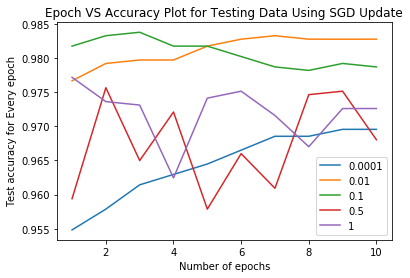

In [58]:
plt.plot(range(1,11),test_data[.0001],label='.0001')
plt.plot(range(1,11),test_data[.01],label='.01')
plt.plot(range(1,11),test_data[.1],label='.1')
plt.plot(range(1,11),test_data[.5],label='.5')
plt.plot(range(1,11),test_data[1],label='1')
plt.legend(etas)
plt.xlabel('Number of epochs')
plt.ylabel('Test accuracy for Every epoch')
plt.title ('Epoch VS Accuracy Plot for Testing Data Using SGD Update')
#plt.legend

plt.show()


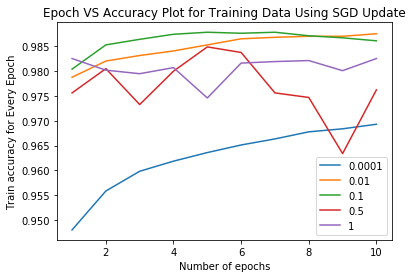

In [59]:
plt.plot(range(1,11),train_data[.0001],label='.0001')
plt.plot(range(1,11),train_data[.01],label='.01')
plt.plot(range(1,11),train_data[.1],label='.1')
plt.plot(range(1,11),train_data[.5],label='.5')
plt.plot(range(1,11),train_data[1],label='1')
plt.legend(etas)
plt.xlabel('Number of epochs')
plt.ylabel('Train accuracy for Every Epoch')
plt.title('Epoch VS Accuracy Plot for Training Data Using SGD Update')
#plt.legend

plt.show()

In [25]:
from sklearn.utils import shuffle
ep=[1,3,10]
epoch2= len(ep)
etas=[.0001,.01,.1,.5,1]
test_data={}
train_data={}

for eta in etas:
    myobj2=LogReg(data2.train_x,data2.train_y,eta)
    accuracies_Test=[]
    accuracies_Train=[]
    for epoch in range(1,11):
        data2.train_x,data2.train_y=shuffle(data2.train_x,data2.train_y,random_state=0)
        print(epoch)
        for j in range(epoch):

        
            x=myLogReg.mini_batch_update(5)
        log_probTrain,accuracy_Train=myobj2.progress(data2.train_x,data2.train_y,'mini_batch_update',5)
        log_probTest,accuracy_Test=myobj2.progress(data2.valid_x,data2.valid_y,'mini_batch_update',5)
        
        accuracies_Test.append(accuracy_Test)
        accuracies_Train.append(accuracy_Train)
        print('The Testing Accuracies are')
        print(accuracies_Test)
        print('The Training Accuracies are')
        print(accuracies_Train)
        
    test_data[eta]=accuracies_Test
    train_data[eta]=accuracies_Train
  

1
The Testing Accuracies are
[0.9558375634517766]
The Training Accuracies are
[0.948118006103764]
2
The Testing Accuracies are
[0.9558375634517766, 0.9588832487309644]
The Training Accuracies are
[0.948118006103764, 0.9562563580874873]
3
The Testing Accuracies are
[0.9558375634517766, 0.9588832487309644, 0.9614213197969543]
The Training Accuracies are
[0.948118006103764, 0.9562563580874873, 0.9599186164801627]
4
The Testing Accuracies are
[0.9558375634517766, 0.9588832487309644, 0.9614213197969543, 0.9629441624365482]
The Training Accuracies are
[0.948118006103764, 0.9562563580874873, 0.9599186164801627, 0.9617497456765005]
5
The Testing Accuracies are
[0.9558375634517766, 0.9588832487309644, 0.9614213197969543, 0.9629441624365482, 0.9639593908629441]
The Training Accuracies are
[0.948118006103764, 0.9562563580874873, 0.9599186164801627, 0.9617497456765005, 0.9633774160732451]
6
The Testing Accuracies are
[0.9558375634517766, 0.9588832487309644, 0.9614213197969543, 0.9629441624365482, 

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in log
C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:127: RuntimeWarning: invalid value encountered in multiply


The Testing Accuracies are
[0.9619289340101523, 0.9700507614213199]
The Training Accuracies are
[0.9641912512716175, 0.9721261444557477]
3
The Testing Accuracies are
[0.9619289340101523, 0.9700507614213199, 0.9700507614213199]
The Training Accuracies are
[0.9641912512716175, 0.9721261444557477, 0.9768056968463886]
4
The Testing Accuracies are
[0.9619289340101523, 0.9700507614213199, 0.9700507614213199, 0.9690355329949238]
The Training Accuracies are
[0.9641912512716175, 0.9721261444557477, 0.9768056968463886, 0.9769074262461851]
5
The Testing Accuracies are
[0.9619289340101523, 0.9700507614213199, 0.9700507614213199, 0.9690355329949238, 0.9675126903553299]
The Training Accuracies are
[0.9641912512716175, 0.9721261444557477, 0.9768056968463886, 0.9769074262461851, 0.9768056968463886]
6
The Testing Accuracies are
[0.9619289340101523, 0.9700507614213199, 0.9700507614213199, 0.9690355329949238, 0.9675126903553299, 0.9644670050761421]
The Training Accuracies are
[0.9641912512716175, 0.97212

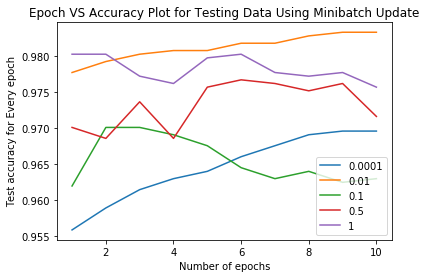

In [27]:
plt.plot(range(1,11),test_data[.0001],label='.0001')
plt.plot(range(1,11),test_data[.01],label='.01')
plt.plot(range(1,11),test_data[.1],label='.1')
plt.plot(range(1,11),test_data[.5],label='.5')
plt.plot(range(1,11),test_data[1],label='1')
plt.legend(etas)
plt.xlabel('Number of epochs')
plt.ylabel('Test accuracy for Every epoch')
plt.title('Epoch VS Accuracy Plot for Testing Data Using Minibatch Update')
#plt.legend

plt.show()

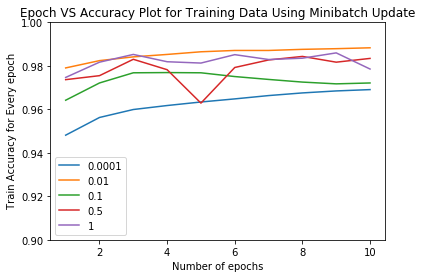

In [28]:
plt.plot(range(1,11),train_data[.0001],label='.0001')
plt.plot(range(1,11),train_data[.01],label='.01')
plt.plot(range(1,11),train_data[.1],label='.1')
plt.plot(range(1,11),train_data[.5],label='.5')
plt.plot(range(1,11),train_data[1],label='1')
plt.legend(etas)
plt.ylim(0.90,1.0)
plt.xlabel('Number of epochs')
plt.ylabel(' Train Accuracy for Every epoch')
plt.title('Epoch VS Accuracy Plot for Training Data Using Minibatch Update')
#plt.legend

plt.show()

2.2 - After completing the class above, loop over the training data and perform ___mini batch gradient descent___ for three different user-defined number of epochs 1, 3, 10], and five different values of eta range [.0001, .01, .1, .5, 1]. Train your model and do the following:

* Using the `progress` method, calculate the accuracy on the training and the valid sets every 100 iterations. Plot them on same graph for every comparison.

* Using `progress` method, calculate the accuracy on the validation set and store it for every epoch.

Don't forget to shuffle your training data after each epoch.

**Q:** Briefly describe the role of learning rate (eta) on the efficiency of convergence during training.

> From my graph , we can infer that the accuracy increases with the number of epochs. We tend to get better accuracy with optimal learning rates.<br/>
> For lower learning rates it takes time to converge and give better accuracies.<br/> 
> In my graph eta of 0.01 takes a while to improve its accuracy<br/>
> For higher learning rates it gives a wavy output because it takes more steps in gradient decent and over shoots<br/>
> In the above graphs the eat of 0.5 and 1 are jumpy because of overshooting.<br/>
> The optimal eta is between 0.01 to 0.1.

**Q:** Briefly describe the role of the number of epochs on validation accuracy.

> As the number of epochs increases the validation accuracy should increase<br/>
> But sometimes for certain eta's like 0.5 or 1 the accuracy decreases<br/>

### [ 30 points] Problem 4: Implementing the Logistic Regression Classifier for Multinomial Classification

You will now create a classifier that is commonly referred to as Multinomial Logistic Regression. The particular method you will be implementing is **One Vs All** or **One Vs Rest**. The dataset will be the MNIST dataset which includes all digits 0-9. You are free to use the functions you created above as needed.

In [60]:
from sklearn import metrics

class Numbers2:
    """
    Class to store MNIST data for images of 0-9
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        self.test_x, self.test_y = valid_set

[5 0 4 1 9 2 1 3 1 4]
true label: 6


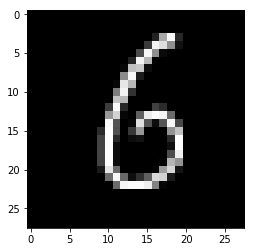

In [61]:
data2 = Numbers2('mnist.pklz')
print(data2.train_y[:10])
def view_digit(example, label=None):
    if label is not None: print("true label: {:d}".format(label))
    plt.imshow(example.reshape(28,28), cmap='gray');
view_digit(data2.train_x[18],data2.train_y[18])

In [62]:
class MultiLogReg:
    """
    Class to store MNIST data for images of 0-9
    """ 
    def __init__(self, X, y, eta = 0.1):
        #self.X = self.normalize_data()
        self.X = X
        #self.y = one_hot_encoding(self, y)
        self.y= y
        self.eta = eta
        
    def one_hot_encoding(self, y):
        # TO DO: Represent the output vector y as a one hot encoding. Create a matrix of dimensions (m X 10) 
        # where m = number of examples, and 10 for number of classes
        # if the class for the ith example is 7, then y[i][7] = 1 and the for k != 7, y[i][k] = 0.
        oh=[]
        for i in range(len(y)):
            vector=np.zeros(9)
            ind=y[i]
            var1=np.insert(vector,ind,1)
            oh.append(var1)
        
        #print(np.array(onehot))
        return(np.array(oh))
                #pass
        
    

        
    def normalize_data(self, X):
        
        # TO DO: Normalize the dataset X using the mean and standard deviation of all the training examples 
        train_mean_data= np.mean(X)
        #print(train_mean)
        train_sd_data=np.std(X)
        #print(train_sd)
        normalized_X_data=(X-train_mean_data)/train_sd_data
        #print(normalized_X)
        return(normalized_X_data)
        
    def get_optimal_parameters(self):
        # TO DO: This is the main training loop. You will have to find the optimal weights for all 10 models
        # Each model is fit to its class which is (0-9), and the cost function will be against all of the other 
        # numbers, i.e. "the rest".
        #pass
        #print(self.y.shape)
        #print(self.y.T)
        #print(self.X.T.shape)
        aa=self.one_hot_encoding(self.y)
        optimal_weights=[]
        weight=[]
        for i in range(10):
            #obj=LogReg(self.X,self.y[:,i])
            obj1=LogReg(self.X,aa[:,i])
            
            for epoch in range(2):
                #print(i)
                weight=obj1.sgd_update()
                #print(w)
            optimal_weights.append(weight)
            
        #print(opt_weights)
        #print(len(opt_weights))
        return(optimal_weights)
            
            
    
    #create 10 objects of log reg(self.X,self.y.T[0])
    #=self.weights.append(object.sgd_update()
    
    def predict(self, test_image):
        # TO DO: This function should return the probabilities predicted by each of the models for some given 
        # input image. The probabilities are sorted with the most likely being listed first.
        # Return a vector of shape (10, 2) with the first column holding the number and the second column with
        # the probability that the test_image is that number
        
        prob1=np.zeros((10,2))
        weights1=self.get_optimal_parameters()
        for ii in range(10):
            score=np.dot(test_image,weights1[ii])
            h = 1.0/(1.0 + np.exp(-score))
            prob1[i,0]=ii
            prob1[i,1]=h
            
        prob1=prob1[prob1[:,1].argsort()[::-1]]
        
        #print(probs.item[0][0])
        
        #print('Model prediction probabilites\n')
        #for j in range(10):
            #print( "{} with probability = {:.3f}".format(int(probs[j,0]), probs[j,1]))
        return(prob1)  
        
        
        
    def accuracy_percent(self,datasets):
        w=self.get_optimal_parameters()
        
        for data_set in datasets:
            
            set_n,y_label,x_data=data_set
            y_label_size=y_label.size
            prob=np.zeros((10,2))
            cnt=0
            for sample in range(y_label_size):
                for num in range(10):
                    score=np.dot(x_data[sample,:],w[num])
                    h = 1.0/(1.0 + np.exp(-score))
                    prob[num,0]=num
                    prob[num,1]=h
                prob = prob[prob[:,1].argsort()[::-1]]
                if prob[0,0] == y_label[sample]:
                    cnt = cnt+1
                    
                
            print("{} correct out of {} : {}% correct".format(cnt, y_label_size, cnt/y_label_size * 100))
            
    def confusionMatrix(self,X,y):
        
      
        y_label=y
        x_data=X
        y_label_s=y_label.size
        prob=np.zeros((10,2))
        weights=self.get_optimal_parameters()
        c=np.zeros((10,10),dtype=int)
        for sample in range(y_label_s):
            for num in range(10):
                score=np.dot(x_data[sample,:],weights[num])
                h = 1.0/(1.0 + np.exp(-score))
                prob[num,0]=num
                prob[num,1]=h
            prob = prob[prob[:,1].argsort()[::-1]]
            i=prob[0,0]
            value=int(i)
            j=y_label[sample]
            c[value][j]+=1
                
         
        
        print(c)
        
        
    def misclassification(self,X,y):
        misclassified_img=[]
        yl=y
        xd=X
        yls=yl.size
        prob=np.zeros((10,2))
        weights=self.get_optimal_parameters()
        for sample in range(yls):
            for num in range(10):
                score=np.dot(xd[sample,:],weights[num])
                h = 1.0/(1.0 + np.exp(-score))
                prob[num,0]=num
                prob[num,1]=h
            prob = prob[prob[:,1].argsort()[::-1]]
            i=prob[0,0]
            value=int(i)
            j=yl[sample]
            
            if value!=j:
                misclassified_img.append((j,value))
        print(misclassified_img)
        print(len(misclassified_img))
            
        
        
            
        
        #pass


        
        
        
        


In [48]:

obj=MultiLogReg(data2.train_x,data2.train_y)
#obj.one_hot_encoding(data2.train_y)
#obj.normalize_data(data2.train_x)
#obj.get_optimal_parameters()
#
#obj.confusionMatrix(data2.train_x,data2.train_y)
#obj.confusionMatrix(data2.test_x,data2.test_y)
#obj.misclassification(data2.train_x,data2.train_y)
#obj.predict(var)
#datasets=[('training set',data2.train_y,data2.train_x)]
#obj.accuracy_percent(datasets)
#datasets1=[('test set',data2.test_y,data2.test_x)]







### QUESTION ###
It is important to know how well your model did on the whole. You need to report the ___accuracy as a percentage___ on the training set and the test set from Numbers2. You should also plot a ___confusion matrix___ for both, just like you did on the last homework and mention the numbers that were misclassified the most

In [63]:
print("The accuracy for the training data\n")
datasets=[('training set',data2.train_y,data2.train_x)]
obj.accuracy_percent(datasets)

print("The confusion matrix for the training data\n")
obj.confusionMatrix(data2.train_x,data2.train_y)


The accuracy for the training data

43459 correct out of 50000 : 86.91799999999999% correct
The confusion matrix for the training data

[[4869    2   99  189   15  189  140   30  193   68]
 [   1 5457   58   41   20   53   29   21  146   38]
 [  10   34 4286  248   18   66   81   48   90    8]
 [   3   13   94 3801    0  170   27    6   48   17]
 [   9    6   72   30 4396  118   80   41   92  255]
 [   4   13   32  207   24 3575  174   11  266   55]
 [   6    0   15    4   12   16 4317    3   13    0]
 [   5   16  103   92   34   48   18 4873   43  410]
 [  25  134  188  301   68  213   80   23 3836   88]
 [   0    3   21  188  272   58    5  119  115 4049]]


In [64]:
print("The accuracy for the training data\n")
datasets=[('testing set',data2.test_y,data2.test_x)]
obj.accuracy_percent(datasets)

print("The confusion matrix for the training data\n")
obj.confusionMatrix(data2.test_x,data2.test_y)

The accuracy for the training data

8758 correct out of 10000 : 87.58% correct
The confusion matrix for the training data

[[ 977    0   12   41    4   51   27   10   32   18]
 [   0 1031   13    4   11    3    7    6   33   12]
 [   2    6  866   35    4   25   19    9   17    0]
 [   1    2   17  767    0   37    7    1    9    3]
 [   1    1   14    5  918   22   13    5   13   44]
 [   0    5   14   57    1  719   30    0   54    5]
 [   0    0    3    2    1    9  847    0    1    0]
 [   4    0   22    7    2   12    5 1025   15   65]
 [   6   19   29   72    9   28   12    6  806   12]
 [   0    0    0   40   33    9    0   28   29  802]]


> From the above matrix we can conclude that the misclassified classes are (0,8) , (0,6), (4,9) (2,3) <br/>